# Housing Affordability in Vancouver
### Rent vs Income Analysis (2019–2024)

This notebook analyzes housing affordability in Vancouver by comparing
rental price trends with income growth using a rent-to-income ratio.


## Analysis Scope

- Geography: Vancouver Census Metropolitan Area (CMA)
- Time Period: 2019–2024
- Metric: Rent-to-Income Ratio
- Affordability Threshold: 30%


In [9]:
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
rent_df = pd.read_csv("../data/processed/vancouver_quarterly_rent_clean.csv")
income_df = pd.read_csv("../data/processed/vancouver_median_income_clean.csv")


In [11]:
rent_df.head()
income_df.head()


,year,median_income
0,2019,43300
1,2020,45800
2,2021,44800
3,2022,45900
4,2023,46300


In [12]:
rent_df.columns

Index(['Geography', 'Rental unit type', 'quarter', 'avg_rent'], dtype='object')

In [13]:
income_df.columns

Index(['year', 'median_income'], dtype='object')

In [14]:
rent_df.shape, income_df.shape

((27, 4), (5, 2))

In [ ]:
# 1) Inspect the weird values (sanity check)
rent_df["quarter"].head(10)


In [ ]:
# 2) Extract quarter number and year from strings like "Q1 2019"
q = rent_df["quarter"].astype(str).str.extract(r"Q([1-4])\s*(\d{4})")

rent_df["q"] = q[0].astype("Int64")     # 1-4
rent_df["year"] = q[1].astype("Int64")  # 2019, 2020, ...


In [ ]:
rent_df[["quarter", "q", "year"]].head(10)
rent_df[["q", "year"]].isna().sum()


In [ ]:
rent_df["period"] = pd.PeriodIndex(year=rent_df["year"], quarter=rent_df["q"], freq="Q").to_timestamp()
rent_df[["quarter", "period"]].head(10)


In [ ]:
rent_df[["quarter","q","year"]].head(10)

rent_df[["q","year"]].isna().sum()

In [ ]:
rent_df["annual_rent"] = rent_df["avg_rent"] * 12


In [ ]:
rent_df[["avg_rent", "annual_rent"]].head()
rent_df["annual_rent"].describe()


In [ ]:
annual_rent_df = (
    rent_df
    .groupby("year", as_index=False)["annual_rent"]
    .mean()
)


In [ ]:
annual_rent_df


In [ ]:
income_df.head()
income_df.columns


In [ ]:
annual_income_df = (
    income_df
    .groupby("year", as_index=False)["avg_income"]
    .mean()
)


In [ ]:
income_df.head()


In [ ]:
income_df.columns


In [ ]:
annual_income_df = (
    income_df
    .groupby("year", as_index=False)["median_income"]
    .mean()
)


In [ ]:
annual_income_df


In [ ]:
annual_rent_df = annual_rent_df[annual_rent_df["year"].between(2019, 2023)]
annual_income_df = annual_income_df[annual_income_df["year"].between(2019, 2023)]


In [ ]:
annual_rent_df
annual_income_df


In [ ]:
affordability_df = pd.merge(
    annual_rent_df,
    annual_income_df,
    on="year",
    how="inner"
)


In [ ]:
affordability_df


In [ ]:
affordability_df["rent_to_income_ratio"] = (
    affordability_df["annual_rent"] / affordability_df["median_income"]
)


In [ ]:
affordability_df
affordability_df["rent_to_income_ratio"].describe()


In [ ]:
plt.figure(figsize=(8,5))
plt.plot(
    affordability_df["year"],
    affordability_df["rent_to_income_ratio"],
    marker="o"
)

plt.axhline(0.30, linestyle="--")

plt.title("Vancouver Housing Affordability: Rent-to-Income Ratio")
plt.xlabel("Year")
plt.ylabel("Rent-to-Income Ratio")

plt.show()


In [17]:
import os
os.getcwd()


'c:\\Users\\Shibi\\Documents\\Data Projects\\Vancouver_housing_analysis\\notebooks'

In [18]:
import os
os.getcwd()


'c:\\Users\\Shibi\\Documents\\Data Projects\\Vancouver_housing_analysis\\notebooks'

In [19]:
os.listdir()


['01_data_sources_and_questions.ipynb',
 '02_load_and_clean_rent_data.ipynb',
 '03_load_and_clean_income_data.ipynb',
 '04_affordability_analysis.ipynb',
 'notebook']

In [22]:
os.listdir("../data/processed")


['vancouver_median_income_clean.csv',
 'vancouver_quarterly_rent_clean.csv',
 'vancouver_quarterly_rent_gold.csv']

In [24]:
rent_path = "../data/processed/vancouver_quarterly_rent_clean.csv"
income_path = "../data/processed/vancouver_median_income_clean.csv"


In [25]:
import pandas as pd

rent_df = pd.read_csv(rent_path)
income_df = pd.read_csv(income_path)

rent_df.head(), income_df.head()


(                                   Geography        Rental unit type  quarter  \
 0  Vancouver, Census metropolitan area (CMA)  Apartment - No bedroom  Q1 2019   
 1  Vancouver, Census metropolitan area (CMA)  Apartment - No bedroom  Q2 2019   
 2  Vancouver, Census metropolitan area (CMA)  Apartment - No bedroom  Q3 2019   
 3  Vancouver, Census metropolitan area (CMA)  Apartment - No bedroom  Q4 2019   
 4  Vancouver, Census metropolitan area (CMA)  Apartment - No bedroom  Q1 2020   
 
    avg_rent  
 0    1730.0  
 1    1680.0  
 2    1640.0  
 3    1670.0  
 4    1650.0  ,
    year  median_income
 0  2019          43300
 1  2020          45800
 2  2021          44800
 3  2022          45900
 4  2023          46300)

In [26]:
os.listdir("../data/processed")


['vancouver_median_income_clean.csv',
 'vancouver_quarterly_rent_clean.csv',
 'vancouver_quarterly_rent_gold.csv']

In [29]:
rent_path = "../data/processed/vancouver_quarterly_rent_gold.csv"
income_path = "../data/processed/vancouver_median_income_clean.csv"


In [31]:
income_df = pd.read_csv(income_path)
income_df.head()


,year,median_income
0,2019,43300
1,2020,45800
2,2021,44800
3,2022,45900
4,2023,46300


In [32]:
income_df.columns


Index(['year', 'median_income'], dtype='object')

In [33]:
import pandas as pd

# Load rent (quarterly)
rent_df = pd.read_csv("../data/processed/vancouver_quarterly_rent_gold.csv", parse_dates=["quarter"])

# Load income (annual)
income_df = pd.read_csv("../data/processed/vancouver_median_income_clean.csv")

# Expand income to quarterly
income_df = income_df.copy()
income_df["quarter"] = pd.to_datetime(income_df["year"].astype(str) + "-01-01")  # temp Jan 1
# Repeat for each quarter
income_df = income_df.loc[income_df.index.repeat(4)].copy()
income_df["quarter"] = income_df.groupby("year").cumcount()
# Map 0 → Mar, 1 → Jun, 2 → Sep, 3 → Dec
income_df["quarter"] = income_df.apply(lambda x: pd.to_datetime(f"{x['year']}-{3*(x['quarter']+1):02d}-01"), axis=1)

income_df = income_df[["quarter", "median_income"]]

income_df.head(8)


,quarter,median_income
0,2019-03-01,43300
0,2019-06-01,43300
0,2019-09-01,43300
0,2019-12-01,43300
1,2020-03-01,45800
1,2020-06-01,45800
1,2020-09-01,45800
1,2020-12-01,45800


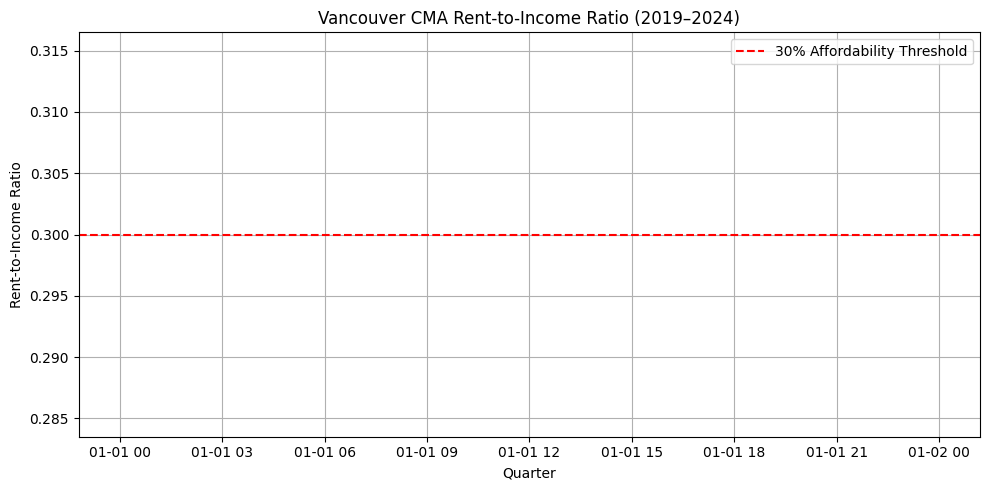

,quarter,avg_rent_all_units,median_income,monthly_income,rent_to_income_ratio


In [34]:
# Final Rent-to-Income Ratio Analysis for Vancouver CMA (2019–2024)

import pandas as pd
import matplotlib.pyplot as plt

# Load rent (quarterly)
rent_path = "../data/processed/vancouver_quarterly_rent_gold.csv"
income_path = "../data/processed/vancouver_median_income_clean.csv"

rent_df = pd.read_csv(rent_path, parse_dates=["quarter"])
income_df = pd.read_csv(income_path)

# Expand annual income to quarterly
income_df = income_df.copy()
income_df = income_df.loc[income_df.index.repeat(4)].copy()  # 4 quarters per year
income_df["quarter_number"] = income_df.groupby("year").cumcount()
# Map 0 → Mar, 1 → Jun, 2 → Sep, 3 → Dec
income_df["quarter"] = income_df.apply(lambda x: pd.to_datetime(f"{x['year']}-{3*(x['quarter_number']+1):02d}-01"), axis=1)
income_df = income_df[["quarter", "median_income"]]

# Aggregate rent across unit types (mean of averages)
rent_q = rent_df.groupby("quarter", as_index=False)["avg_rent"].mean().rename(columns={"avg_rent": "avg_rent_all_units"})

# Merge rent and income
merged = pd.merge(rent_q, income_df, on="quarter", how="inner")

# Compute monthly income if income is annual (already annual, so divide by 12)
merged["monthly_income"] = merged["median_income"] / 12

# Compute rent-to-income ratio
merged["rent_to_income_ratio"] = merged["avg_rent_all_units"] / merged["monthly_income"]

# Save final dataset
out_path = "../data/processed/rent_to_income_vancouver_cma.csv"
merged.to_csv(out_path, index=False)

# Plot
plt.figure(figsize=(10,5))
plt.plot(merged["quarter"], merged["rent_to_income_ratio"], marker='o')
plt.axhline(0.30, color='red', linestyle='--', label='30% Affordability Threshold')
plt.title("Vancouver CMA Rent-to-Income Ratio (2019–2024)")
plt.xlabel("Quarter")
plt.ylabel("Rent-to-Income Ratio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

merged.head()


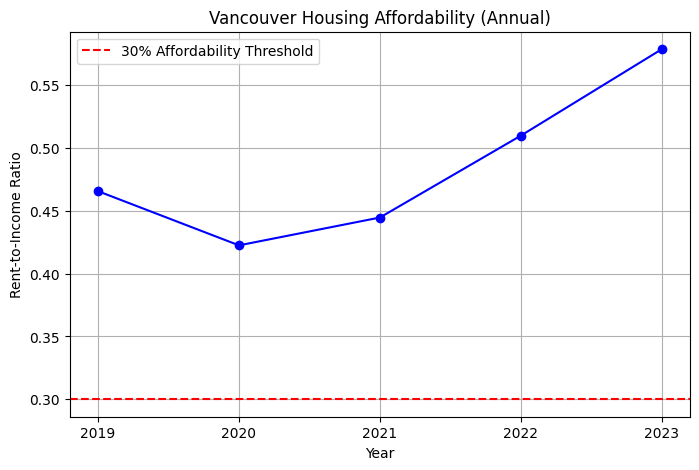

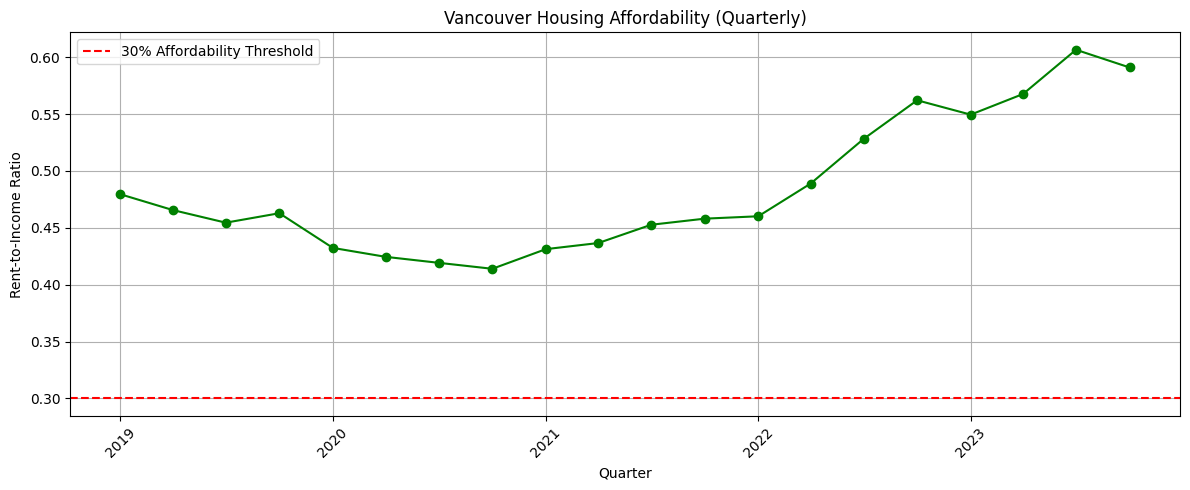

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load processed data ---
rent_df = pd.read_csv("../data/processed/vancouver_quarterly_rent_clean.csv")
income_df = pd.read_csv("../data/processed/vancouver_median_income_clean.csv")

# --- Extract quarter and year from "quarter" column like "Q1 2019" ---
q = rent_df["quarter"].astype(str).str.extract(r"Q([1-4])\s*(\d{4})")
rent_df["q"] = q[0].astype("Int64")        # quarter 1-4
rent_df["year"] = q[1].astype("Int64")     # year
rent_df["period"] = pd.PeriodIndex.from_fields(year=rent_df["year"], quarter=rent_df["q"], freq="Q").to_timestamp()
rent_df["annual_rent"] = rent_df["avg_rent"] * 12

# --- Annual aggregation ---
annual_rent_df = rent_df.groupby("year", as_index=False)["annual_rent"].mean()
annual_income_df = income_df.groupby("year", as_index=False)["median_income"].mean()

# Keep 2019–2023 only
annual_rent_df = annual_rent_df[annual_rent_df["year"].between(2019, 2023)]
annual_income_df = annual_income_df[annual_income_df["year"].between(2019, 2023)]

# Merge annual data
annual_df = pd.merge(annual_rent_df, annual_income_df, on="year")
annual_df["rent_to_income_ratio"] = annual_df["annual_rent"] / annual_df["median_income"]

# --- Annual Plot ---
plt.figure(figsize=(8,5))
plt.plot(
    annual_df["year"],
    annual_df["rent_to_income_ratio"],
    marker="o",
    color="blue"
)
plt.axhline(0.30, linestyle="--", color="red", label="30% Affordability Threshold")
plt.title("Vancouver Housing Affordability (Annual)")
plt.xlabel("Year")
plt.ylabel("Rent-to-Income Ratio")
plt.xticks(annual_df["year"])
plt.legend()
plt.grid(True)
plt.show()


# --- Quarterly calculation ---
quarterly_df = pd.merge(rent_df, income_df, on="year", how="left")
quarterly_df["rent_to_income_ratio"] = quarterly_df["annual_rent"] / quarterly_df["median_income"]

# --- Quarterly Plot ---
plt.figure(figsize=(12,5))
plt.plot(
    quarterly_df["period"],
    quarterly_df["rent_to_income_ratio"],
    marker="o",
    color="green"
)
plt.axhline(0.30, linestyle="--", color="red", label="30% Affordability Threshold")
plt.title("Vancouver Housing Affordability (Quarterly)")
plt.xlabel("Quarter")
plt.ylabel("Rent-to-Income Ratio")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


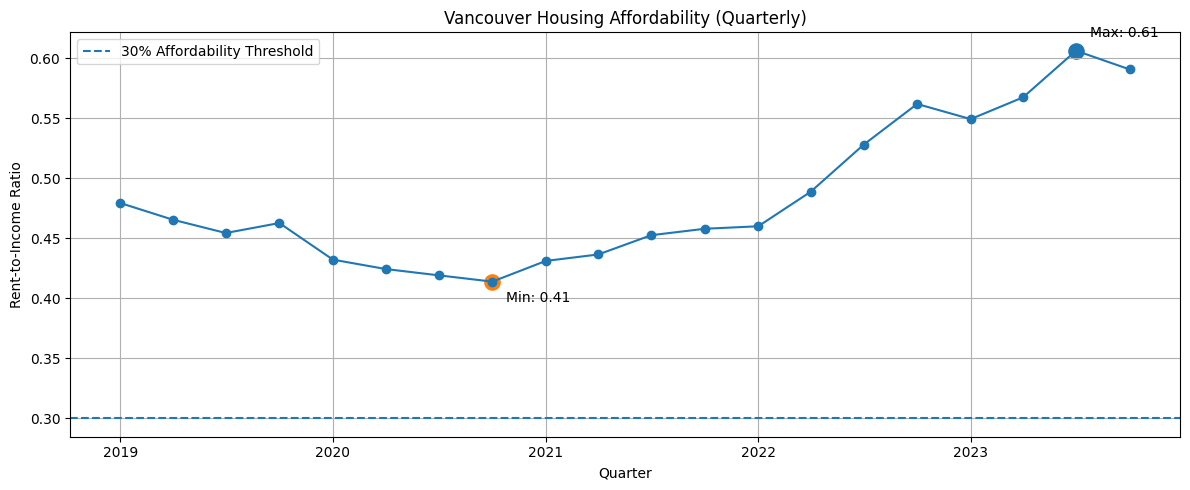

In [38]:
# Sort to ensure the line is plotted in time order
quarterly_df = quarterly_df.sort_values("period").reset_index(drop=True)

# Find max and min quarters
max_row = quarterly_df.loc[quarterly_df["rent_to_income_ratio"].idxmax()]
min_row = quarterly_df.loc[quarterly_df["rent_to_income_ratio"].idxmin()]

plt.figure(figsize=(12,5))
plt.plot(quarterly_df["period"], quarterly_df["rent_to_income_ratio"], marker="o")

plt.axhline(0.30, linestyle="--", label="30% Affordability Threshold")

# Highlight max/min
plt.scatter([max_row["period"]], [max_row["rent_to_income_ratio"]], s=120)
plt.scatter([min_row["period"]], [min_row["rent_to_income_ratio"]], s=120)

plt.annotate(
    f"Max: {max_row['rent_to_income_ratio']:.2f}",
    xy=(max_row["period"], max_row["rent_to_income_ratio"]),
    xytext=(10, 10),
    textcoords="offset points"
)

plt.annotate(
    f"Min: {min_row['rent_to_income_ratio']:.2f}",
    xy=(min_row["period"], min_row["rent_to_income_ratio"]),
    xytext=(10, -15),
    textcoords="offset points"
)

plt.title("Vancouver Housing Affordability (Quarterly)")
plt.xlabel("Quarter")
plt.ylabel("Rent-to-Income Ratio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Quarterly Insights

- The rent-to-income ratio reached its lowest point (~41%) in late 2020, reflecting temporary affordability relief during the early COVID period.
- From 2021 through early 2022, affordability remained relatively stable, with the ratio fluctuating between ~43% and ~46%.
- Beginning in mid-2022, the rent-to-income ratio increased sharply, peaking at approximately 61% in 2023.
- This sustained rise indicates that rental costs grew significantly faster than median household income, marking a structural deterioration in housing affordability.


The quarterly trend explains the sharp increase observed in annual averages for 2022 and 2023, as multiple consecutive quarters of rising rent pressure compounded over time.


## Assumptions & Limitations

### Assumptions
- Median household income is assumed to represent the typical renter’s earning capacity.
- Rental prices are treated as representative of market-wide averages across unit types.
- Annual rent is calculated by annualizing average monthly rent (monthly rent × 12).
- Median income is assumed to be evenly distributed across quarters within a given year for quarterly analysis.

### Limitations
- This analysis does not account for utilities, transportation, or other cost-of-living expenses that further affect affordability.
- Rental data is aggregated across unit types and does not differentiate by dwelling size or location within the CMA.
- Income data is not adjusted for inflation; real (inflation-adjusted) affordability may be worse than shown.
- The analysis focuses solely on the Vancouver CMA and does not compare affordability across other Canadian cities.
- Household composition (e.g., single vs. multi-income households) is not explicitly modeled.

### Interpretation Note
As a result, the rent-to-income ratios presented here should be interpreted as a **baseline affordability indicator**, rather than a complete measure of housing stress.
